In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

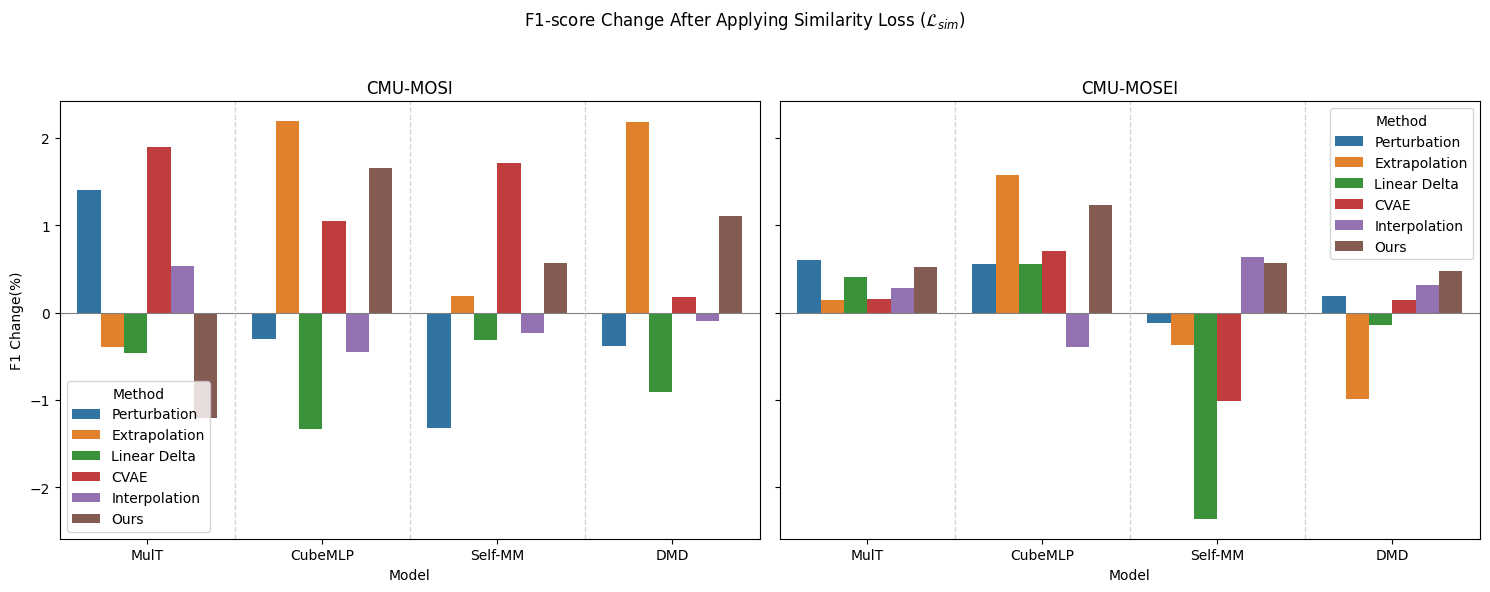

In [2]:
# TABLE 2
methods = ['Perturbation', 'Extrapolation', 'Linear Delta', 'CVAE', 'Interpolation', 'Ours']
models = ['MulT', 'CubeMLP', 'Self-MM', 'DMD']

mosi_data = [
    [+1.4, -0.3, -1.32, -0.38],
    [-0.39, +2.19, +0.19, +2.18],
    [-0.46, -1.33, -0.31, -0.91],
    [+1.89, +1.05, +1.71, +0.18],
    [+0.53, -0.45, -0.23, -0.10],
    [-1.21, +1.65, +0.57, +1.11]
]
mosei_data = [
    [+0.6, +0.56, -0.12, +0.19],
    [+0.14, +1.58, -0.37, -0.99],
    [+0.41, +0.56, -2.36, -0.14],
    [+0.16, +0.71, -1.01, +0.14],
    [+0.28, -0.39, +0.64, +0.32],
    [+0.52, +1.23, +0.57, +0.48]
]

# DataFrame 생성
rows = []
for dataset_name, data in zip(["CMU-MOSI", "CMU-MOSEI"], [mosi_data, mosei_data]):
    for i, method in enumerate(methods):
        for j, model in enumerate(models):
            rows.append({
                "Dataset": dataset_name,
                "Model": model,
                "Method": method,
                "F1 Change(%)": data[i][j]
            })
df = pd.DataFrame(rows)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# CMU-MOSI
sns.barplot(
    data=df[df["Dataset"] == "CMU-MOSI"],
    x="Model", y="F1 Change(%)", hue="Method",
    order=models,
    ax=axes[0]
)
axes[0].set_title("CMU-MOSI")
axes[0].axhline(0, color='gray', linewidth=0.8)

# 모델 구간 사이 세로선 추가
for i in range(1, len(models)):
    axes[0].axvline(i - 0.5, color='lightgray', linestyle='--', linewidth=1)

# CMU-MOSEI
sns.barplot(
    data=df[df["Dataset"] == "CMU-MOSEI"],
    x="Model", y="F1 Change(%)", hue="Method",
    order=models,
    ax=axes[1]
)
axes[1].set_title("CMU-MOSEI")
axes[1].axhline(0, color='gray', linewidth=0.8)

# 모델 구간 사이 세로선 추가
for i in range(1, len(models)):
    axes[1].axvline(i - 0.5, color='lightgray', linestyle='--', linewidth=1)

fig.suptitle("F1-score Change After Applying Similarity Loss ($\\mathcal{L}_{sim}$)")
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("simloss_ablation_with_dividers.pdf")
plt.show()

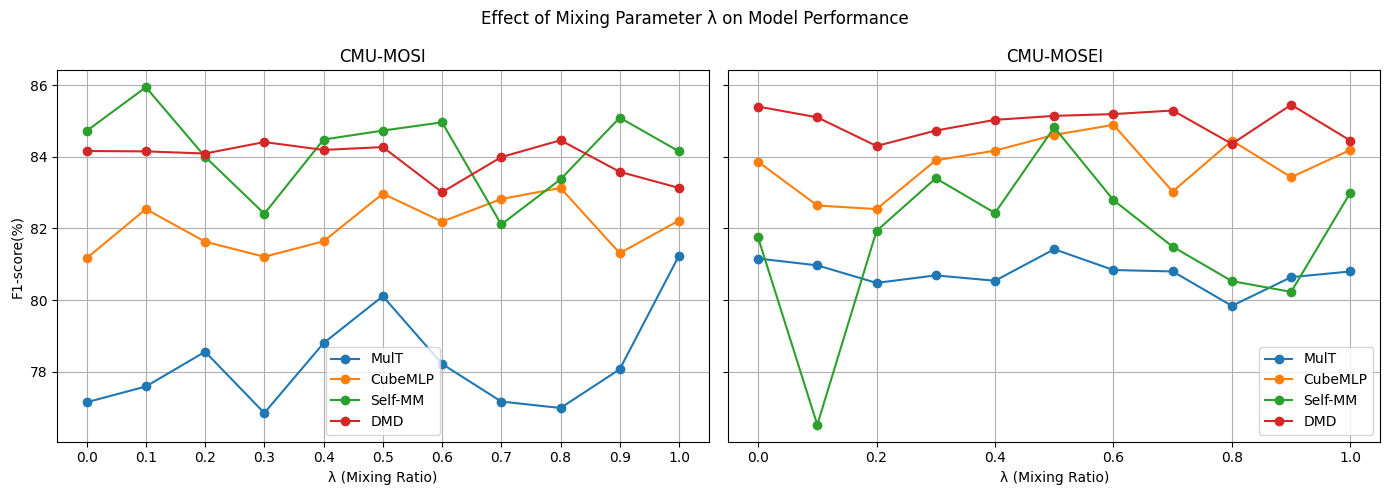

In [3]:
# TABLE 3
lambda_values = np.arange(0.0, 1.1, 0.1)
models = ['MulT', 'CubeMLP', 'Self-MM', 'DMD']

mosi_scores = {
    'MulT': [77.15, 77.59, 78.56, 76.85, 78.80, 80.11, 78.22, 77.17, 76.99, 78.07, 81.24],
    'CubeMLP': [81.17, 82.54, 81.63, 81.21, 81.64, 82.97, 82.19, 82.82, 83.13, 81.31, 82.22],
    'Self-MM': [84.72, 85.94, 84.00, 82.41, 84.48, 84.73, 84.96, 82.11, 83.37, 85.09, 84.15],
    'DMD': [84.16, 84.15, 84.09, 84.41, 84.19, 84.27, 83.01, 83.99, 84.46, 83.58, 83.13]
}

mosei_scores = {
    'MulT': [81.16, 80.97, 80.48, 80.69, 80.54, 81.42, 80.84, 80.80, 79.84, 80.64, 80.80],
    'CubeMLP': [83.86, 82.64, 82.54, 83.90, 84.17, 84.61, 84.89, 83.03, 84.45, 83.43, 84.19],
    'Self-MM': [81.75, 76.52, 81.93, 83.40, 82.43, 84.82, 82.79, 81.49, 80.53, 80.23, 83.00],
    'DMD': [85.40, 85.10, 84.30, 84.73, 85.03, 85.14, 85.19, 85.29, 84.36, 85.45, 84.45]
}

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# CMU-MOSI
for model in models:
    axes[0].plot(lambda_values, mosi_scores[model], marker='o', label=model)
axes[0].set_title("CMU-MOSI")
axes[0].set_xlabel("λ (Mixing Ratio)")
axes[0].set_ylabel("F1-score(%)")
axes[0].set_xticks(lambda_values)
axes[0].grid(True)
axes[0].legend()

# CMU-MOSEI
for model in models:
    axes[1].plot(lambda_values, mosei_scores[model], marker='o', label=model)
axes[1].set_title("CMU-MOSEI")
axes[1].set_xlabel("λ (Mixing Ratio)")
axes[1].grid(True)
axes[1].legend()

plt.suptitle("Effect of Mixing Parameter λ on Model Performance")
plt.tight_layout()
plt.savefig("lambda_effect_fixed_xticks.pdf")  # 저장
plt.show()